In [1]:
# In this micro-project, we'll practice using Jupyter Notebook on the server to design a CNN for
# MNIST image classification and train it using the GPUs.

# Imports various libraries (note that we are using tf.Keras, not vanilla Keras).
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

c:\caisplusplus\env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\caisplusplus\env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\caisplusplus\env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\caisplusplus\env\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1ty

In [2]:
# Loads the MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


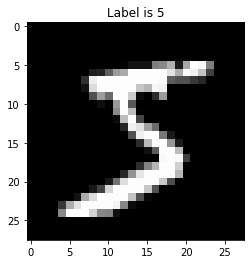

In [3]:
# Plots an MNIST digit.
plt.title("Label is {}".format(y_train[0]))
plt.imshow(x_train[0], cmap="gray")

In [4]:
# Preprocesses images.
print(x_train.shape, x_test.shape)

# Adds an extra dimension to the image tensor.
# This represents the "channels" of the image.
# BW images have one channel; RGB images have three.
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Converts the tensors from uint8 to float32.
# Most CNNs expect inputs of type float32.
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Scales values to be between 0 and 1.
x_train /= 255
x_test /= 255

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
# Preprocesses labels.
print(y_train.shape, y_test.shape)

# Converts labels from numbers (e.g., 7)
# to one-hot vectors (e.g., [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]).

# Q: Why is this necessary?
# A: We can't have predictions that are in between values. Ex: if the network ouputs 2.5, this doesn't really tell us anything about what it actually predicted.

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape, y_test.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [11]:
# Create a function which defines a CNN. Use the tf.Keras Functional API.
# You'll need both convolutional and dense layers, as well as a softmax activation at the end.
# (If you're stuck on the architecture, Slack me!)

# Q: What shape is the input?
# A: (28, 28, 1)

# Q: What shape is the output?
# A: (10)

# Q: Why are we using softmax (as opposed to sigmoid)?
# A: softmax allows for multiclass classification without training multiple binary classifiers

# Q: (Bonus) How is softmax calculated (in your own words)?
# A: Compute exponential of each softmax score and then normalize it

def cnn():
    # Your architecture here!
    model = keras.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu', padding='same', input_shape=[28, 28, 1]),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
        keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        keras.layers.MaxPool2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=10, activation='softmax'),
    ])
    return model
    

In [12]:
# Instantiate your CNN, then compile it with the Adam optimizer, categorical crossentropy loss, and accuracy metric.

# Q: Why are we using categorical crossentropy loss?
# A: Each image can only belong to one class

# Q: (Bonus) How is categorical crossentropy loss calculated (in your own words)?
# A: 

# Your code here!
model = cnn()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Fit your model for 20 epochs using the GPUs.

# Q: What batch size will you use? Why?
# A: 16, I'm not using batch normalization so my batches don't need to be too big, but I wouldn't set it >32 in any case

# Your code here!
model.fit(x_train, y_train,
         batch_size=16,
         epochs=20)

Epoch 1/20
60000/60000 [==============================] - 15s 243us/sample - loss: 0.3513 - acc: 0.8936
Epoch 2/20
60000/60000 [==============================] - 14s 235us/sample - loss: 0.1083 - acc: 0.9752
Epoch 3/20
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0826 - acc: 0.9823
Epoch 4/20
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0698 - acc: 0.9845
Epoch 5/20
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0628 - acc: 0.9859
Epoch 6/20
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0558 - acc: 0.9870
Epoch 7/20
60000/60000 [==============================] - 14s 239us/sample - loss: 0.0492 - acc: 0.9887
Epoch 8/20
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0519 - acc: 0.9880
Epoch 9/20
60000/60000 [==============================] - 14s 235us/sample - loss: 0.0549 - acc: 0.9880
Epoch 10/20
60000/60000 [==============================] - 14s 2

In [14]:
# Evaluate your model on the test dataset.

# Q: Why is it necessary to separate train and test datasets?
# A: You want to test the model on images it has never seen before.

# Your code here!
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.0526 - acc: 0.9918


[0.05262234711186256, 0.9918]